<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-II/blob/main/SYE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SERPIENTES Y ESCALERAS


En la siguiente imagen se observa el tablero con el que se realizará este programa para encontrar el número promedio de lanzamientos necesarios para llegar a la meta.

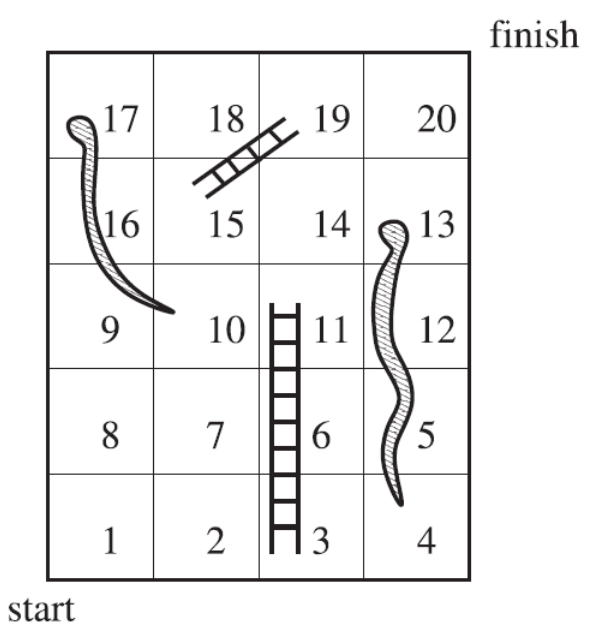

In [ ]:
# prompt: Insertar imagen con el nombre de la imagen
from IPython.display import Image
# Reemplaza 'nombre_de_la_imagen.jpg' con el nombre de tu imagen
Image(filename='TABLERO.png')

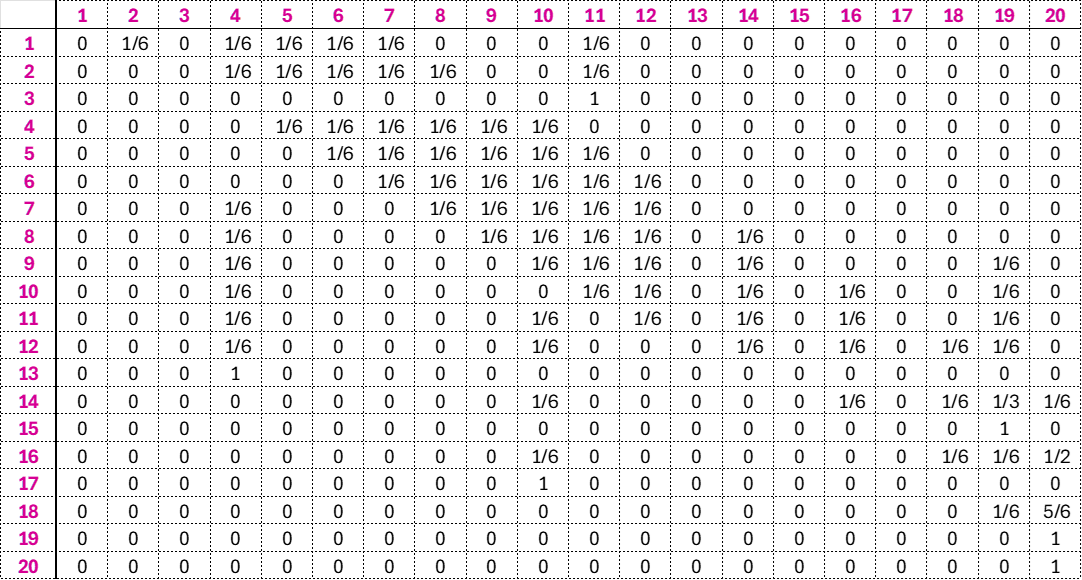

In [ ]:
Image(filename='MATRIZ.png')

Buscamos resolver el sistema de ecuaciones para encontrar el valor esperado de número de lanzamientos para llegar a la meta, el cual debe de ser de la forma:

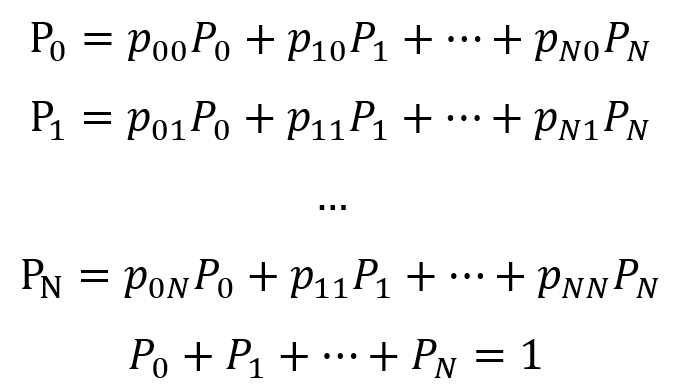

In [2]:
Image(filename='SISTEMA.png')

Para calcular el número esperado de lanzamientos necesarios para llegar a la última casilla de un tablero, utilizando su matriz de transición, aplicaremos conceptos de cadenas de Markov.
Pasos:
1. Definir la matriz de transición:
La matriz de transición P de tamaño N×N describe las probabilidades de moverse de un estado (casilla) i a un estado j en un solo paso (un lanzamiento de dado, por ejemplo).
2. Identificar los estados:
El estado inicial es la primera casilla (habitualmente la casilla 00).
El estado absorbente es la última casilla (es decir, una vez que llegas aquí, te quedas en ella, y no puedes salir más).

3. Reorganizar la matriz de transición:
Reorganiza la matriz P para que los estados absorbentes (es decir, la última casilla) estén en la parte inferior derecha.

La matriz de transición P se puede dividir en bloques de la siguiente forma:

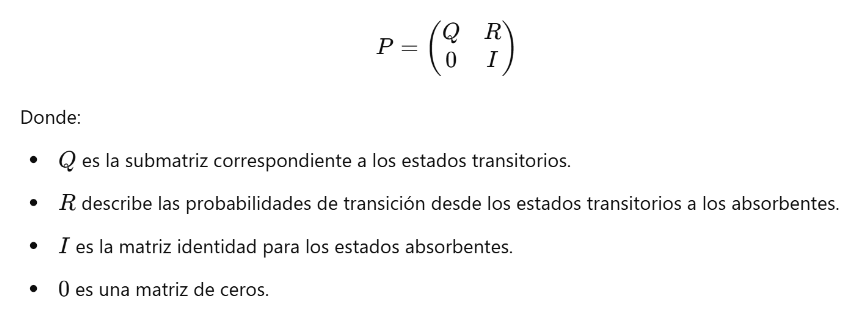

In [17]:
Image(filename='P.png')

4. Calcular la matriz fundamental F, la cual es una herramienta matemática que nos ayuda a calcular el número esperado de visitas a los estados transitorios antes de llegar a un estado absorbente.

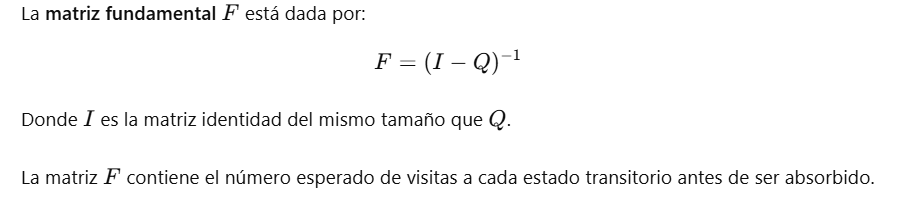

In [18]:
Image(filename='F.png')

5. Calcular el número esperado de pasos: \\
El número esperado de pasos desde el estado inicial (casilla 0) hasta llegar a la última casilla se obtiene sumando los elementos de la primera fila de la matriz F. Es decir, si la casilla inicial es la i-ésima, el número esperado de pasos para llegar a la última casilla (absorbedora) es:

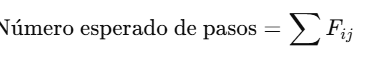

In [20]:
Image(filename='NE.png')



Donde $F_ij$ es el número esperado de veces que el proceso está en el estado j, partiendo desde el estado i.\\
Cargaremos la matriz en un archivo excel y después implementaremos los pasos anteriores en Python utilizando librerias como numpy y pandas.

In [21]:
import numpy as np
import pandas as pd

# Leer matriz de transición desde archivo de Excel
def leer_matriz_desde_excel(archivo_excel, hoja=0):
    # Lee el archivo Excel (especifica la hoja si es necesario)
    df = pd.read_excel(archivo_excel, sheet_name=hoja, header=None)
    # Convierte el DataFrame en una matriz NumPy
    P = df.to_numpy()
    return P

# Calcular el número esperado de pasos
def calcular_pasos_esperados(P):
    # Extraer la submatriz Q (sin los estados absorbentes)
    Q = P[:-1, :-1]

    # Calcular la matriz fundamental
    I = np.eye(Q.shape[0])
    F = np.linalg.inv(I - Q)

    # Calcular el número esperado de pasos desde el estado inicial (casilla 0)
    num_esperado_pasos = np.sum(F[0])
    return num_esperado_pasos

# Ejemplo de uso
archivo_excel = 'SYE_MATRIZ.xlsx'  # Nombre del archivo Excel
P = leer_matriz_desde_excel(archivo_excel)  # Leer la matriz de transición

# Calcular y mostrar el número esperado de pasos
num_esperado_pasos = calcular_pasos_esperados(P)
print(f'Número esperado de lanzamientos: {num_esperado_pasos}')

Número esperado de lanzamientos: 6.903276215916245


In [9]:
import random as rnd
import matplotlib.pyplot as plt

En el siguiente programa se configura el número de casillas que se debe avanzar de acuerdo el número que se aparezca al lanzar el dado, para ello creamos una variable aleatoria, y como la probabilidad de que aparezca cualquier número de un dado es 1/6

In [10]:
def dado():
  casilla = 0
  x = rnd.random()
  if 0 <= x < 1/6:
    casilla = 1
    return casilla
  if 1/6 <= x < 2/6:
    casilla = 2
    return casilla
  if 2/6 <= x < 3/6:
    casilla = 3
    return casilla
  if 3/6 <= x < 4/6:
    casilla = 4
    return casilla
  if 4/6 <= x < 5/6:
    casilla = 5
    return casilla
  if 5/6 <= x < 1:
    casilla = 6
    return casilla

Primero supongamos que el tablero esta en blanco, sin serpientes ni escaleras.

In [11]:
#Tablero en blanco
posicion = 0
n = 100
l = 0
for i in range(n):
  lanzamiento = dado()
  posicion = posicion + lanzamiento
  print(posicion)
  l += 1
  if posicion >= 20:
    break
print("El  numero de lanzamientos para llegar al final en un tablero en blanco es: ", l)

1
5
10
12
13
18
19
22
El  numero de lanzamientos para llegar al final en un tablero en blanco es:  8


Agregamos las casillas en las que se encuentran las serpientes y escaleras y además, aquellas a donde nos lleva.

In [12]:
#Definimos el número de casillas
casillas = 20
#Establecemos un número de lanzamientos
n = 100
# Guardamos las casillas que tienen serpientes y escaleras
serpientes = [13,17]
s = [4,10]
escaleras = [3,15]
e = [11,19]
posicion = 0
l = 0
for i in range(n):
  l += 1
  lanzamiento = dado()
  posicion = posicion + lanzamiento
  print(posicion)
  for j in range(2):
    if posicion == serpientes[j]:
      posicion = s[j]
      print(posicion)
    if posicion == escaleras[j]:
      posicion = e[j]
      print(posicion)
  if posicion >= casillas:
    break
print("Has llegado a la meta con", l, "lanzamientos")


4
10
12
16
21
Has llegado a la meta con 5 lanzamientos


In [13]:
def histograma(l):                                  #Esta función imprime la estimación y el histograma
  plt.hist(lan, bins=25, color='#FFDEAD', alpha=0.7)
  plt.axvline(np.mean(l),label='Media')
  plt.xlabel('lanzamientos')
  plt.ylabel('Frecuencia')
  plt.legend()
  print('Lanzamientos promedio (Media): ', np.mean(lan))
  return

Ahora, configuramos el programa de tal manera que el experimento se pueda repetir cierta cantidad de veces, para así calcular el número promedio de lanzamientos.

In [14]:
def exp(ne):
  #Definimos el número de casillas
  casillas = 20
  #Establecemos un número de lanzamientos
  n = 100
  # Guardamos las casillas que tienen serpientes y escaleras
  serpientes = [13,17]
  s = [4,10]
  escaleras = [3,15]
  e = [11,19]
  posicion = 1
  l = 0
  for i in range(n):
    l += 1
    lanzamiento = dado()
    posicion = posicion + lanzamiento
    for j in range(2):
      if posicion == serpientes[j]:
        posicion = s[j]
      if posicion == escaleras[j]:
        posicion = e[j]
    if posicion >= casillas:
      break
  return l


[9, 7, 12, 5, 7, 6, 13, 13, 10, 15, 5, 12, 6, 8, 4, 5, 7, 6, 6, 6, 5, 12, 8, 6, 6, 8, 3, 3, 12, 4, 8, 8, 5, 4, 7, 8, 8, 5, 9, 9, 9, 7, 6, 6, 5, 6, 6, 6, 4, 6, 6, 8, 6, 13, 6, 13, 5, 3, 3, 4, 5, 5, 4, 5, 3, 4, 7, 7, 6, 8, 5, 6, 4, 8, 5, 13, 9, 4, 9, 4, 10, 7, 6, 3, 3, 5, 6, 4, 6, 10, 4, 12, 6, 4, 6, 21, 10, 3, 16, 4, 7, 4, 12, 5, 4, 11, 13, 9, 6, 4, 6, 5, 5, 7, 4, 6, 8, 11, 12, 10, 4, 9, 14, 5, 5, 8, 6, 6, 5, 5, 5, 6, 6, 12, 5, 24, 5, 6, 11, 7, 5, 15, 4, 5, 15, 12, 5, 8, 4, 4, 6, 5, 7, 6, 3, 10, 5, 7, 6, 8, 13, 4, 4, 4, 14, 6, 7, 5, 4, 10, 7, 10, 5, 11, 6, 6, 7, 7, 5, 10, 9, 9, 13, 5, 4, 6, 8, 4, 11, 7, 7, 6, 6, 4, 6, 8, 10, 10, 11, 4, 5, 8, 6, 5, 6, 7, 12, 6, 8, 7, 13, 13, 11, 6, 6, 6, 15, 5, 5, 11, 11, 3, 8, 8, 5, 7, 11, 6, 7, 18, 8, 7, 8, 4, 6, 6, 10, 8, 6, 9, 7, 4, 5, 12, 5, 8, 4, 6, 8, 6, 4, 12, 6, 16, 6, 10, 5, 6, 8, 7, 6, 25, 8, 8, 5, 5, 6, 8, 4, 8, 7, 3, 6, 4, 6, 5, 10, 7, 3, 4, 12, 6, 6, 7, 10, 5, 7, 5, 10, 4, 5, 5, 4, 6, 9, 6, 7, 10, 9, 4, 4, 6, 8, 10, 5, 18, 5, 9, 6, 7, 7, 14

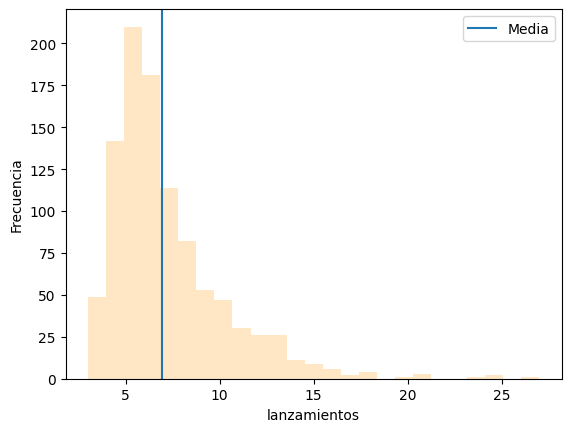

In [15]:
ne = 1000
n = 50
lan = []
for i in range(ne):
  lan.append(exp(n))
print(lan)
histograma(lan)

Por lo tanto, el número promedio de lanzamientos necesario para llegar a la meta es de aproximadamente 7.

In [ ]:
#Lista de colores pastel el python
pastel_colors = ['#FFDAB9', '#FFDEAD', '#F0E68C', '#E0FFFF', '#AFEEEE', '#ADD8E6', '#90EE90', '#98FB98', '#FA8072', '#FFA07A']

['#FFDAB9', '#FFDEAD', '#F0E68C', '#E0FFFF', '#AFEEEE', '#ADD8E6', '#90EE90', '#98FB98', '#FA8072', '#FFA07A']


En la siguiente gráfica se muestran la cantidad de lanzamientos necesarios para llegar a la meta en cada experimento.

In [ ]:
y =[]
for i in range(50):
  y.append(lan[i])

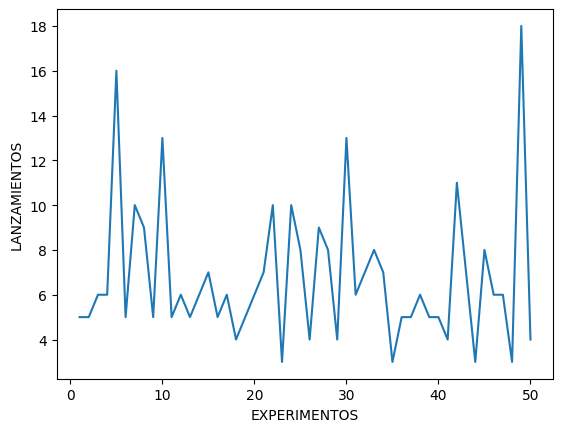

In [ ]:
import matplotlib.pyplot as plt
ite = list(range(1,51))
plt.plot(ite, y)
plt.xlabel('EXPERIMENTOS')
plt.ylabel('LANZAMIENTOS')
plt.show()